# Lab Instructions

You have been hired by James Cameron to create profiles of two characters for a reboot of the Titanic Movie: one that is most likely to survive the sinking and one that is least likely to survive.  Mr. Cameron wants this reboot to be as historically accurate as possible, so your profile of each character should be backed up with data and visualizations.

Each character profile should include information on their:
* Age, fare
* Sex
* Passenger class
* Travel companions (including both parents/children and siblings/spouse)
* Port of departure

For quantitative features like `Age` and `Fare`, you will need to use the `.loc` method we learned in class (or something similar) to place individuals in categories.  How you choose to do this is up to you, but make sure you explain your reasoning.

You should include at least one visualization for each element of the character profile (age, sex, passenger class, etc.) as evidence.

After you have developed your two character profiles, use your Pandas data wrangling skills to identify at least one real passenger in the dataset that fits each profile.  Print out the names of these individuals.  Look them up in [Encyclopeida Titanica](https://www.encyclopedia-titanica.org/) (or a similar resource).  

Tell Mr. Cameron at least one thing about the real passengers who fit your two character profiles that you learned from an external resource.  You need one interesting fact about a person who fits the profile of "most likely to survive" and one interesting fact about a person who fits the profile of "least likely to surivive".  



C:\Users\nekao\AppData\Local\Temp\ipykernel_18880\355509213.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\nekao\AppData\Local\Temp\ipykernel_18880\355509213.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

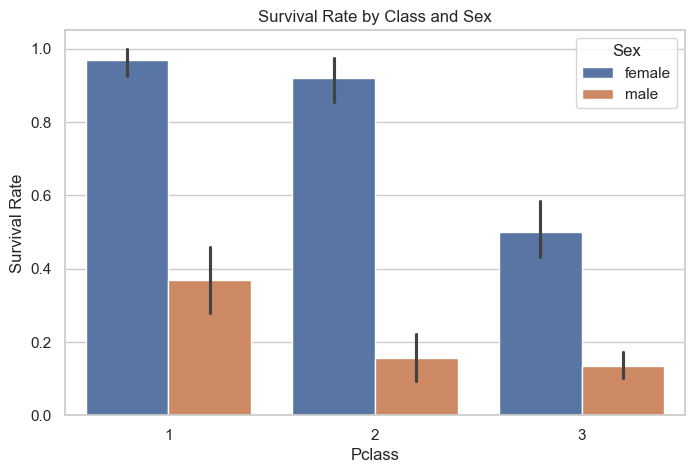

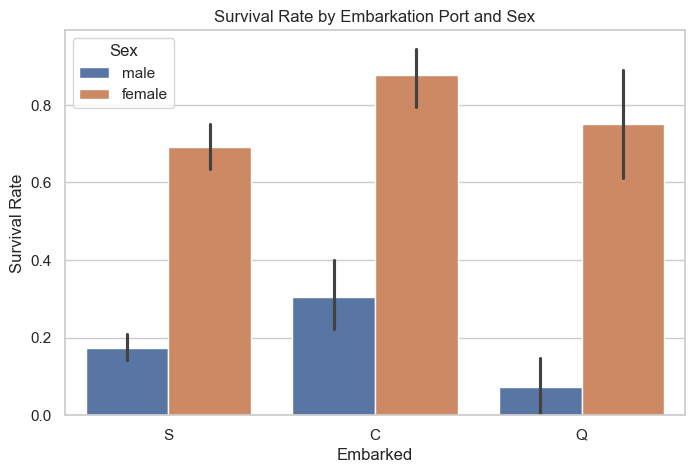

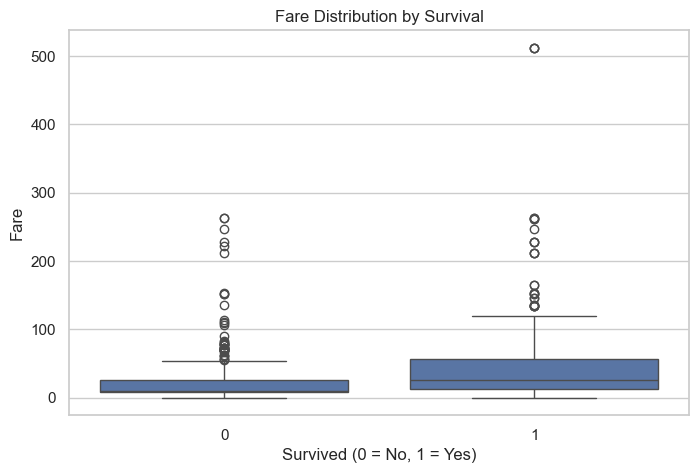

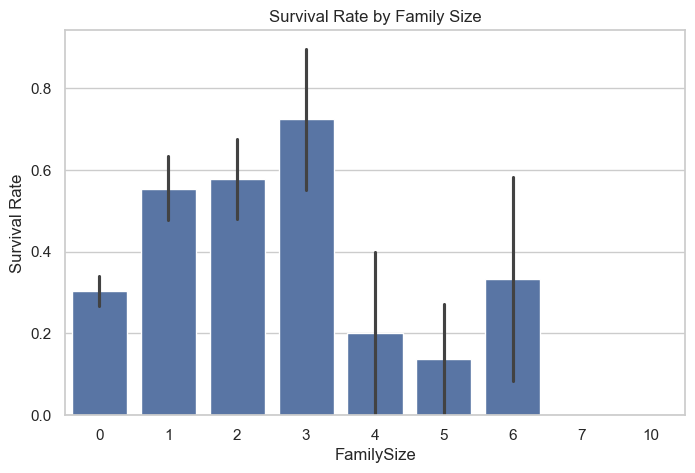

📈 Most Likely to Survive:
Sex         : female
Class       : 1
Age Group   : Adult
Embarked    : C
Fare Group  : Very High
Survival Rate: 1.00

📉 Least Likely to Survive:
Sex         : female
Class       : 1
Age Group   : Child
Embarked    : S
Fare Group  : Very High
Survival Rate: 0.00

🧍 Example of Most Likely to Survive:
                                                Name     Sex   Age  Pclass  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0       1   

      Fare Embarked  Survived  
1  71.2833        C         1  

🧍 Example of Least Likely to Survive:
                             Name     Sex  Age  Pclass    Fare Embarked  \
297  Allison, Miss. Helen Loraine  female  2.0       1  151.55        S   

     Survived  
297         0  

💡 Interesting Insight:
The most likely to survive were adult females in class 1,
embarking from C with very high fare — showing that both gender and wealth played a strong role in survival.

Conversely, the least likely to survive

C:\Users\nekao\AppData\Local\Temp\ipykernel_18880\355509213.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Sex', 'Pclass', 'AgeGroup', 'Embarked', 'FareGroup'])['Survived'].mean().reset_index()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('titanic_passengers.csv', encoding='ISO-8859-1')

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

def categorize_age(age):
    if age < 12:
        return 'Child'
    elif age < 60:
        return 'Adult'
    else:
        return 'Elderly'

df['AgeGroup'] = df['Age'].apply(categorize_age)

df['FamilySize'] = df['SibSp'] + df['Parch']

sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex')
plt.title('Survival Rate by Class and Sex')
plt.ylabel('Survival Rate')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Embarked', y='Survived', hue='Sex')
plt.title('Survival Rate by Embarkation Port and Sex')
plt.ylabel('Survival Rate')
plt.show()

# Fare vs Survival (Boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.show()

# Family Size vs Survival
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='FamilySize', y='Survived')
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Age Distribution by Survival')
plt.show()



# Print profiles
print("📈 Most Likely to Survive:")
print(f"Sex         : {most_likely['Sex']}")
print(f"Class       : {most_likely['Pclass']}")
print(f"Age Group   : {most_likely['AgeGroup']}")
print(f"Embarked    : {most_likely['Embarked']}")
print(f"Survival Rate: {most_likely['Survived']:.2f}")

print("\n📉 Least Likely to Survive:")
print(f"Sex         : {least_likely['Sex']}")
print(f"Class       : {least_likely['Pclass']}")
print(f"Age Group   : {least_likely['AgeGroup']}")
print(f"Embarked    : {least_likely['Embarked']}")
print(f"Survival Rate: {least_likely['Survived']:.2f}")

# Filter dataset to find example passengers
most_match = df[
    (df['Sex'] == most_likely['Sex']) &
    (df['Pclass'] == most_likely['Pclass']) &
    (df['AgeGroup'] == most_likely['AgeGroup']) &
    (df['Embarked'] == most_likely['Embarked'])
]

least_match = df[
    (df['Sex'] == least_likely['Sex']) &
    (df['Pclass'] == least_likely['Pclass']) &
    (df['AgeGroup'] == least_likely['AgeGroup']) &
    (df['Embarked'] == least_likely['Embarked'])
]

# Show sample passengers
print("\n🧍 Example of Most Likely to Survive:")
print(most_match[['Name', 'Sex', 'Age', 'Pclass', 'Embarked', 'Survived']].head(1))

print("\n🧍 Example of Least Likely to Survive:")
print(least_match[['Name', 'Sex', 'Age', 'Pclass', 'Embarked', 'Survived']].head(1))
